In [7]:
import math
from pprint import pprint
from collections import Counter

class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

In [2]:
!pip install matplotlib

## ES4
### Write a program in a programming language of your choice, that given a text T outputs the LZ77 encoding and the LZss encoding of the text.
### A parameter of the program should be W, the length of the search buffer.
### Compare the number of triplets denoted by 𝑧 produced by LZ77(T) (or by LZss(T)) and the number of the equal-letter runs denoted by 𝑟 produced by the BWT(T).
### Test experimentally whether the following relations hold:
- 𝑟 = 𝑂(𝑧 log^2 𝑛)
- 𝑧 = 𝑂(𝑟 log 𝑛),
where 𝑛 is the length of the input text
### Compute the value of z and r for the following binary words
- the set, for a given k>0, of the words 𝑇_𝑘 = {𝑤_𝑖,𝑘 = Π_𝑗=1 ^𝑖 𝑎𝑏^𝑗^𝑘 | 𝑖 ≥ 1}
- the Fibonacci words of odd order
- The Fibonacci words of even order
- Given an integer k>5, the set of the word 𝑤_𝑘 defined as (Π_𝑖=2 ^𝑘−1 𝑠_𝑖 𝑒_𝑖 )𝑞𝑘, where 𝑠_𝑖 = 𝑎𝑏^𝑖𝑎𝑎, 𝑒_𝑖 = 𝑎𝑏^𝑖𝑎𝑏𝑎^(𝑖−2) and 𝑞_𝑘 = 𝑎𝑏^𝑘𝑎

### LZ77 coding

In [1]:
import random
import string
import math
import matplotlib.pyplot as plt


def lz77_encoding(text: str, w: int = 20):
    """Compute LZ77 encoding by using the sliding_window which slides over text and search the longest substring
       Then replace the found substring with the triplet (offset, length, next_char)
    """
    output = []

    char_to_scan_index = 0

    # Init search buffer and look-ahead buffer
    search_b = ""
    look_ahead_b = ""

    while char_to_scan_index < len(text):
        # At each iteration, divide buffers based on "char_to_scan_index"
        # param w, wich is customizable, limits the search_buffer
        search_b = text[max(0, char_to_scan_index - w) : char_to_scan_index]
        look_ahead_b = text[char_to_scan_index:]

        # Default "triplet" for those cases where a substr is not found in search buffer
        triplet = (0, 0, look_ahead_b[0])

        substr = ""
        # For each char in look-ahead-buffer search a substr in search buffer
        for char in look_ahead_b[: len(look_ahead_b) - 1]:
            substr += char
            if substr not in search_b:
                substr = substr[: len(substr) - 1]
                break

        # If substr found has length 0, the output is the default triplet
        # then current char to scan index is incresed by 1 in order to point to next char
        length = len(substr)
        if length == 0:
            output.append(triplet)
            char_to_scan_index += 1
            continue

        end_check = True
        index = 0

        # Check if substr repeats, even partially, till second last character in look-ahead buffer
        for i in range(len(look_ahead_b) - 1):
            if index % length == 0:
                index = 0

            # the check fail with one of the condition:
            #  - if any char of subs differs from look-ahead ones
            #  - if subs does not ends at the end of search-buffer
            if (substr[index] != look_ahead_b[i]) or (search_b[-length:] != substr):
                end_check = False
                break
            index += 1

        # If subs repeats until second last char of look-ahead-buffer the length value will be increased
        # considering the lentgh of that repetition until second last char
        if end_check:
            length += index

        start_index = str(search_b).rfind(substr)
        offset = len(search_b) - start_index - 1

        # Check if there are chars after the substr in the look-ahead buffer
        if offset < len(search_b) and length < len(look_ahead_b):
            triplet = (offset + 1, length, look_ahead_b[length])
        # else if subtr lengh is greater than look-ahead ones means there's no chars left
        elif offset < len(search_b):
            triplet = (
                offset + 1,
                length - index,
                look_ahead_b[len(look_ahead_b) - 1],
            )

        output.append(triplet)
        char_to_scan_index += triplet[1] + 1

    return output

### LZss coding

In [5]:
def lzss_encoding(text: str, w=20):
    """Compute LZss encoding"""
    output = []
    search_b = ""
    look_ahead_b = ""

    current = 0
    while current < len(text):
        search_b = text[max(0, current - w) : current]
        look_ahead_b = text[current:]

        # Default pair if no substr is found
        pair = (0, look_ahead_b[0])

        subs = ""
        # Subts search in search-buffer
        for c in look_ahead_b[: len(look_ahead_b)]:
            subs += c
            if subs not in search_b:
                subs = subs[: len(subs) - 1]
                break

        length = len(subs)
        # If no substr is found 
        if length == 0:
            output.append(pair)
            current += 1
            continue

        end_check = True
        index = 0
        # Check if some symbols should be repeated until end of look-ahead-buffer
        for i in range(len(look_ahead_b)):
            if index % length == 0:
                index = 0

            if subs[index] != look_ahead_b[i] or search_b[-length:] != subs:
                end_check = False
                break

            index += 1

        if end_check:
            length += index

        start_index = str(search_b).rfind(subs)
        offset = len(search_b) - start_index - 1

        # Check if there are chars after the substr in the look-ahead buffer
        if offset < len(search_b) and length <= len(look_ahead_b):
            pair = (offset + 1, length)
        # else if subtr lengh is greater than look-ahead ones means there's no chars left
        elif offset < len(search_b):
            pair = (offset + 1, length - index)

        output.append(pair)
        current += pair[1]

    return output

### Utils

In [6]:
def find_equal_letter_runs(bwt_result: str):
    """Identify and return the equal-letter runs in the BWT result"""
    runs = []
    n = len(bwt_result)

    if n == 0:
        return runs

    current_char = bwt_result[0]
    run_start = 0

    for i in range(1, n):
        if bwt_result[i] != current_char:
            # Append the run as a tuple (character, start_index, length)
            #if i - run_start > 1:
            runs.append((current_char, run_start, i - run_start))
            current_char = bwt_result[i]
            run_start = i

    # Append the last run
    #if n - run_start > 1:
    runs.append((current_char, run_start, n - run_start))

    return runs, len(runs)


def bwt_via_cyclic_rotations(T: str):
    """Compute BWT using sorting of cyclic rotations"""
    n = len(T)

    rotations = [T[i:] + T[:i] for i in range(n)]
    rotations_sorted = sorted(rotations)

    # for r in rotations_sorted:
    #    print(f"{r[:-1]}{bcolors.OKGREEN}{r[-1]}{bcolors.ENDC}")

    I = rotations_sorted.index(T)
    # compute BWT by taking last character from each sorted rotation
    bwt_result = "".join(rotation[-1] for rotation in rotations_sorted)
    return bwt_result, I


def get_fibonacci_words(i):
    """Return the sequence of Fibonacci words up to the ith"""
    if i <= 0:
        return []
    elif i == 1:
        return ["a"]
    elif i == 2:
        return ["a", "ab"]

    words = ["a", "ab"]
    for j in range(2, i):
        words.append(words[j - 1] + words[j - 2])

    return words

### Analysis: Encoding with LZ77, LZss and BWT

In [9]:
# LZ77
# text = "acaaacbbbbbbbbbba"
text = "aababbbabaababbbabbabb"
# text = "xyxzxxyxzzxxyzzxz"
w = 20
lz77_enc = lz77_encoding(text, w)
print("LZ77 output code:", lz77_enc)

# LZss
# text = "acaaacbbbbbbbbbba"
text = "abcdeabcdeabcde"
w = 16
lzss_enc = lzss_encoding(text, w)
print("LZss output code:", lzss_enc)

# BWT
text = "acaaacbbbbbbbbbba"
bwt_enc = bwt_via_cyclic_rotations(text)
print("BWT output code:", bwt_enc)

runs, len_runs = find_equal_letter_runs(bwt_enc[0])
print("Equal letter runs:", runs)
print("\tlength:", len_runs)

LZ77 output code: [(0, 0, 'a'), (1, 1, 'b'), (2, 2, 'b'), (4, 3, 'a'), (9, 8, 'b'), (3, 2, 'b')]
LZss output code: [(0, 'a'), (0, 'b'), (0, 'c'), (0, 'd'), (0, 'e'), (5, 10)]
BWT output code: ('cbaaabbbbbbbbbcaa', 3)
Equal letter runs: [('c', 0, 1), ('b', 1, 1), ('a', 2, 3), ('b', 5, 9), ('c', 14, 1), ('a', 15, 2)]
	length: 6


## Analysis: Compare the number of triplets denoted by z (produced by LZ77 or LZss) and the number of the equal-letter runs denoted by r produced by BWT

Test experimentally wheter the following relations hold:
- r = O(z log^2 n)
- z = O(r log n)

In [10]:
def plot_lzs_vs_bwt(text_dim_start: int = 10, text_dim_end: int = 100):
    """Generate sample text from text_dim_start to text_dim_end
    then plot the lengths for each algorithm of encoded results for each sample text in the range"""

    lz77_lengths, lzss_lengths, bwt_lengths = [], [], []
    # Support vars for storing intermediate results of log operations
    lz_log2_n, bwtr_log_n = [], []

    # at each iteration a text with i symbols is generated and given as input to LZ77, LZss and BWT
    for i in range(text_dim_start, text_dim_end + 1):
        text = "".join(random.choices(string.ascii_lowercase, k=i))
        n = len(text)

        # Perform the codings and store the lengths
        lz77_length = len(lz77_encoding(text))
        lzss_length = len(lzss_encoding(text))
        runs, bwt_n_runs = find_equal_letter_runs(bwt_via_cyclic_rotations(text)[0])

        lz77_lengths.append(lz77_length)
        lzss_lengths.append(lzss_length)
        bwt_lengths.append(bwt_n_runs)

        # functions that we want to prove
        lz_log2_n.append(lz77_length * math.pow(math.log10(n), 2))
        bwtr_log_n.append(bwt_n_runs * math.log10(n))


    # compute the moltiplication between r*log n and a constant c
    # to prove that c* r log n is >= z for each x > x0
    c = 2
    for i in range(len(bwtr_log_n)):
        bwtr_log_n[i] *= c

    # compute the moltiplication between z*log^2n and a constant c
    # to prove that c * z log^2n is >= z for each x > x0
    c = 2
    for i in range(len(lz_log2_n)):
        lz_log2_n[i] *= c

    fig1, ax1 = plt.subplots()
    fig2, ax2 = plt.subplots()
    fig3, ax3 = plt.subplots()

    x = range(text_dim_start, text_dim_end + 1)

    ax1.plot(x, lz77_lengths, label="LZ77", linestyle="-", color="y")
    ax1.plot(x, lzss_lengths, label="LZss", linestyle="-", color="g")
    ax1.plot(x, bwt_lengths, label="BWT", linestyle="-", color="b")
    ax1.legend(title="Compression Methods")
    ax1.set_title("Number of Triplets/Pairs vs Equal-Letter Runs")
    ax1.set_ylabel("Number of Triplets/Pairs/Runs")
    ax1.set_xlabel("Text Length")
    ax1.grid(True, which="both", linestyle="", linewidth=1)

    ax2.plot(x, lz77_lengths, label="LZ77", linestyle="-", color="y")
    ax2.plot(x, lzss_lengths, label="LZss", linestyle="-", color="g")
    ax2.plot(x, bwtr_log_n, label="(r log n)", linestyle="-", color="r")
    ax2.legend(title="Compression Methods")
    ax2.set_title("LZ77 and LZSS vs O(BWT Runs * log n)")
    ax2.set_ylabel("Number of Triplets/Pairs/Runs")
    ax2.set_xlabel("Text Length")
    ax2.grid(True, which="both", linestyle="", linewidth=1)

    ax3.plot(x, lzss_lengths, label="LZss", linestyle="-", color="g")
    ax3.plot(x, bwt_lengths, label="BWT", linestyle="-", color="b")
    ax3.plot(x, lz_log2_n, label="(z log^2 n)", linestyle="-", color="r")
    ax3.legend(title="Compression Methods")
    ax3.set_title("r = O(z log^2 n)")
    ax3.set_title("BWT Runs vs O(LZ77/LZSS * log^2 n)")
    ax3.set_ylabel("Number of Triplets/Pairs/Runs")
    ax3.set_xlabel("Text Length")
    ax3.grid(True, which="both", linestyle="", linewidth=1)

    return fig1, fig2, fig3

/var/folders/ww/nd2nsnkn1vg62wxrct4szmjw0000gn/T/ipykernel_84003/349105632.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


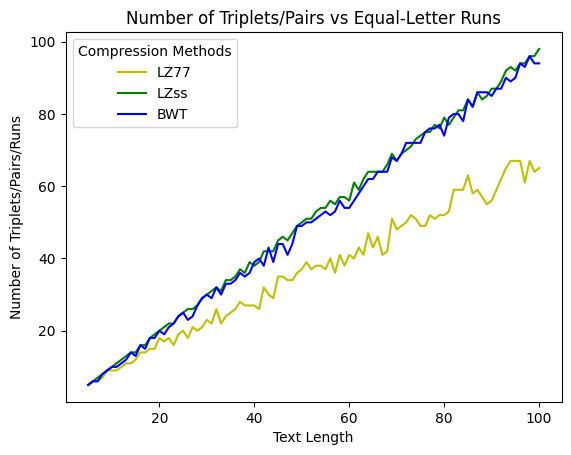

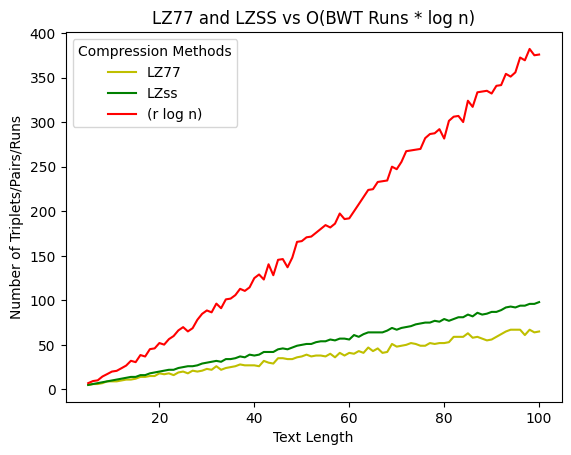

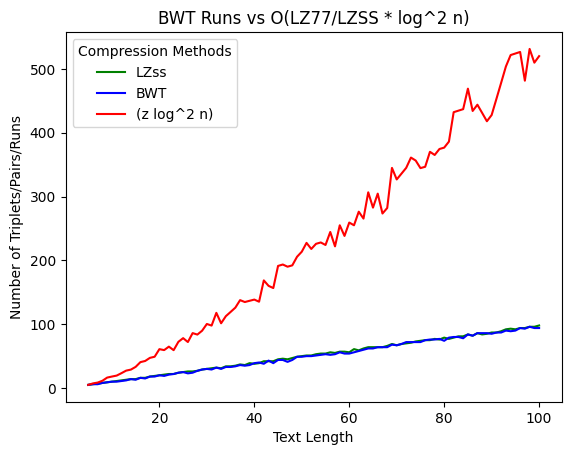

In [11]:
fig1, fig2, fig3 = plot_lzs_vs_bwt(text_dim_start=5, text_dim_end=100)
fig1.show()

### Primo Grafico (Triplette/Pairs vs Runs BWT)

Mostra la crescita del numero di triplette di LZ77 e LZSS confrontata con il numero di run di BWT.  
Le curve di LZSS e BWT sembrano seguire un andamento simile, mentre LZ77 tende a essere più bassa.  
Ciò suggerisce che il numero di run del BWT è comparabile a quello di LZSS e superiore a LZ77 in alcuni punti.  

### Secondo Grafico (LZ77, LZSS vs O(BWT Runs * log n))

La curva rossa rappresenta O(r log n), ovvero il valore atteso se la relazione z = O(r log n) fosse verificata.   
Vediamo che la curva rossa è nettamente sopra le curve di LZ77 e LZSS, il che suggerisce che la relazione z <= O(r log n) è plausibile  
(ovvero, la crescita di z è limitata da O(r log n)).  

Questo supporta la relazione teorica, dato che il numero di triplette z rimane ben al di sotto del limite asintotico superiore.  

### Terzo Grafico (BWT Runs vs O(LZ77/LZSS * log² n))

La curva rossa rappresenta O(z log^2 n). Le curve di BWT (blu) e LZSS (verde) rimangono al di sotto.  
Questo suggerisce che il numero di run del BWT cresce più lentamente rispetto a O(z log^2 n), confermando sperimentalmente la relazione   
r = O(z log^2 n).

## Analysis: Compute the value of z and r for the following binary words:
1. the set, for a given k>0, of the words 𝑇_𝑘 = {𝑤_𝑖,𝑘 = Π_𝑗=1 ^𝑖 𝑎𝑏^𝑗^𝑘 | 𝑖 ≥ 1}
2. the Fibonacci words of odd order
3. The Fibonacci words of even order
4. Given an integer k > 5, the set of the word 𝑤_𝑘 defined as (Π_𝑖=2 ^𝑘−1 𝑠_𝑖 𝑒_𝑖 ) 𝑞𝑘
where 𝑠_𝑖 = 𝑎𝑏^𝑖𝑎𝑎, 𝑒_𝑖 = 𝑎𝑏^𝑖𝑎𝑏𝑎^(𝑖−2) and 𝑞_𝑘 = 𝑎𝑏^𝑘𝑎

In [12]:
def generate_T_k_words(k: int, i: int):
    """
    Generate for a given k > 0, the word T_k defined as:
    T_k = w_i,k = Π_j=1^i ab^j^k where i ≥ 1
    """
    if k <= 0:
        raise ValueError("Error, k must be > 0")
    if i < 1:
        raise ValueError("Error, i must be ≥ 1")

    output = ""

    # Loop from j to i to construct the word ab^j^k
    for j in range(1, i + 1):
        block = "a" + "b" * (j**k)
        output += block

    return output


# Compute the value of z (Number of triplets) and r (Number of runs) for different strings
print("Insieme delle word formate come concatenazione multipla della stringa 'ab^j^k'")
t_k_words = generate_T_k_words(k=2, i=3)
print(t_k_words)

L, I = bwt_via_cyclic_rotations(t_k_words)
runs, r = find_equal_letter_runs(L)
print("BWT:", L, "runs:", runs)

lz77_enc = lz77_encoding(t_k_words)
print("LZ77:", lz77_enc)
z = len(lz77_enc)
print(f"r: {r}, z: {z}")

Insieme delle word formate come concatenazione multipla della stringa 'ab^j^k'
ababbbbabbbbbbbbb
BWT: bbbbabbbbbbabbbba runs: [('b', 0, 4), ('a', 4, 1), ('b', 5, 6), ('a', 11, 1), ('b', 12, 4), ('a', 16, 1)]
LZ77: [(0, 0, 'a'), (0, 0, 'b'), (2, 2, 'b'), (2, 2, 'a'), (5, 4, 'b'), (3, 3, 'b')]
r: 6, z: 6


In [13]:
fib_words = get_fibonacci_words(i=5)
print(fib_words)

# only fibonacci words with odd order
odd_fib = "".join(fib_words[1::2])
print(odd_fib)

L, I = bwt_via_cyclic_rotations(odd_fib)
runs, r = find_equal_letter_runs(L)
print("BWT:", L, "runs:", runs)

lz77_enc = lz77_encoding(odd_fib)
print("LZ77:", lz77_enc)
z = len(lz77_enc)
print(f"r: {r}, z: {z}")

['a', 'ab', 'aba', 'abaab', 'abaababa']
ababaab
BWT: bbbaaaa runs: [('b', 0, 3), ('a', 3, 4)]
LZ77: [(0, 0, 'a'), (0, 0, 'b'), (2, 2, 'a'), (1, 1, 'b')]
r: 2, z: 4


In [14]:
fib_words = get_fibonacci_words(i=5)
print(fib_words)

# only fibonacci words with odd order
odd_fib = "".join(fib_words[0::2])
print(odd_fib)

L, I = bwt_via_cyclic_rotations(odd_fib)
runs, r = find_equal_letter_runs(L)
print("BWT:", L, "runs:", runs)

lz77_enc = lz77_encoding(odd_fib)
print("LZ77:", lz77_enc)
z = len(lz77_enc)
print(f"r: {r}, z: {z}")

['a', 'ab', 'aba', 'abaab', 'abaababa']
aabaabaababa
BWT: babbbaaaaaaa runs: [('b', 0, 1), ('a', 1, 1), ('b', 2, 3), ('a', 5, 7)]
LZ77: [(0, 0, 'a'), (1, 1, 'b'), (3, 3, 'a'), (3, 3, 'b'), (0, 0, 'a')]
r: 4, z: 5


In [15]:
def get_set_w_k(k: int) -> str:
    if k <= 5:
        raise ValueError("K must be > 5")

    output = []

    # first perform (Π_𝑖=2 ^𝑘−1 𝑠_𝑖 𝑒_𝑖 )
    for i in range(2, k):
        s = f"a{'b' * i}aa"
        e = f"a{'b' * i}aba{'a' * (i - 2)}"
        output.append(s)
        output.append(e)

    # then add qk = (ab^k a)
    q = f"a{'b' * k}a"
    output.append(q)

    return "".join(output)


k = 6
output = get_set_w_k(k)

L, I = bwt_via_cyclic_rotations(output)
runs, r = find_equal_letter_runs(L)
print("BWT:", L)
print("runs:", runs)

lz77_enc = lz77_encoding(output)
print("LZ77:", lz77_enc)
z = len(lz77_enc)
print(f"r: {r}, z: {z}")

BWT: bbabbbbabababaaaaaabbbbaaaaaaaaaaabbabbbabbbbabbbbbbbaabbbbbaabbbaabaa
runs: [('b', 0, 2), ('a', 2, 1), ('b', 3, 4), ('a', 7, 1), ('b', 8, 1), ('a', 9, 1), ('b', 10, 1), ('a', 11, 1), ('b', 12, 1), ('a', 13, 6), ('b', 19, 4), ('a', 23, 11), ('b', 34, 2), ('a', 36, 1), ('b', 37, 3), ('a', 40, 1), ('b', 41, 4), ('a', 45, 1), ('b', 46, 7), ('a', 53, 2), ('b', 55, 5), ('a', 60, 2), ('b', 62, 3), ('a', 65, 2), ('b', 67, 1), ('a', 68, 2)]
LZ77: [(0, 0, 'a'), (0, 0, 'b'), (1, 1, 'a'), (1, 1, 'a'), (5, 3, 'b'), (6, 4, 'b'), (12, 5, 'b'), (13, 4, 'a'), (8, 3, 'b'), (7, 7, 'a'), (9, 4, 'a'), (10, 4, 'b'), (8, 8, 'a'), (19, 5, 'a'), (12, 5, 'b'), (0, 0, 'a')]
r: 26, z: 16
